In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as dtr
%matplotlib inline

In [29]:
df = pd.read_excel('data.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [30]:
df.rename(columns = {'AT':'Temperature °C', 
                     'V':'Exhaust Vacuum cm Hg',
                     'AP':'Ambient Pressure milibar', 
                     'RH':'Relative Humidity %', 
                     'PE':'energy output MW'}, inplace = True)

In [31]:
df.head()

,Temperature °C,Exhaust Vacuum cm Hg,Ambient Pressure milibar,Relative Humidity %,energy output MW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [32]:
df.shape

(9568, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature °C            9568 non-null   float64
 1   Exhaust Vacuum cm Hg      9568 non-null   float64
 2   Ambient Pressure milibar  9568 non-null   float64
 3   Relative Humidity %       9568 non-null   float64
 4   energy output MW          9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [34]:
df.isnull().sum()

Temperature °C              0
Exhaust Vacuum cm Hg        0
Ambient Pressure milibar    0
Relative Humidity %         0
energy output MW            0
dtype: int64

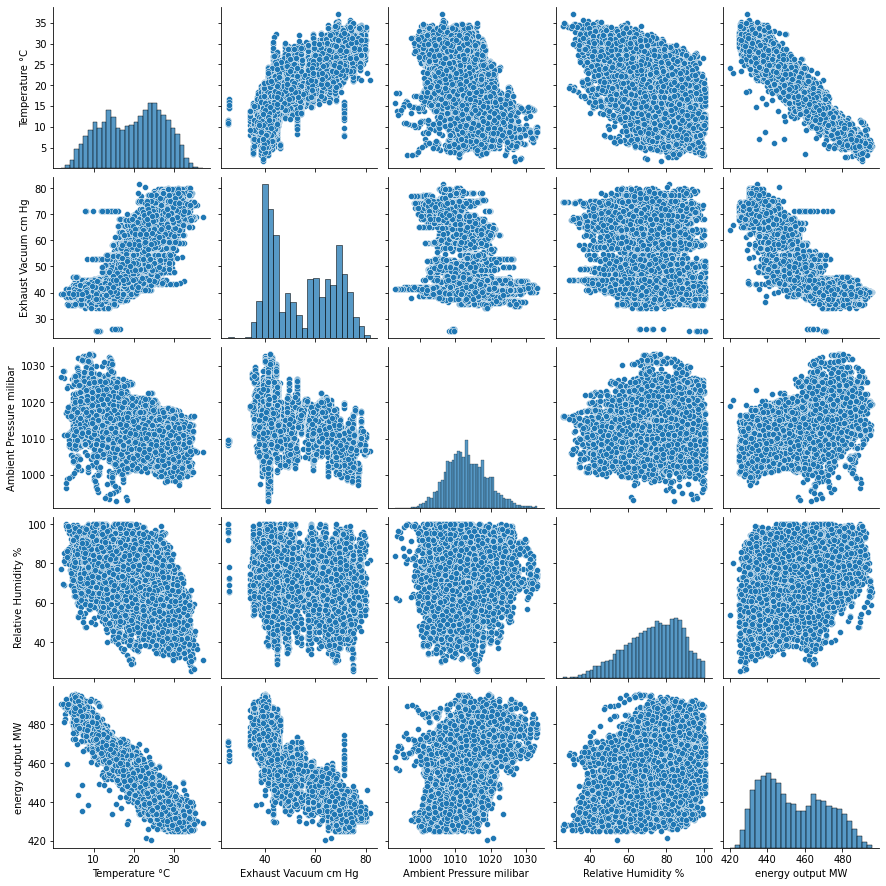

In [35]:
sns.pairplot(df)

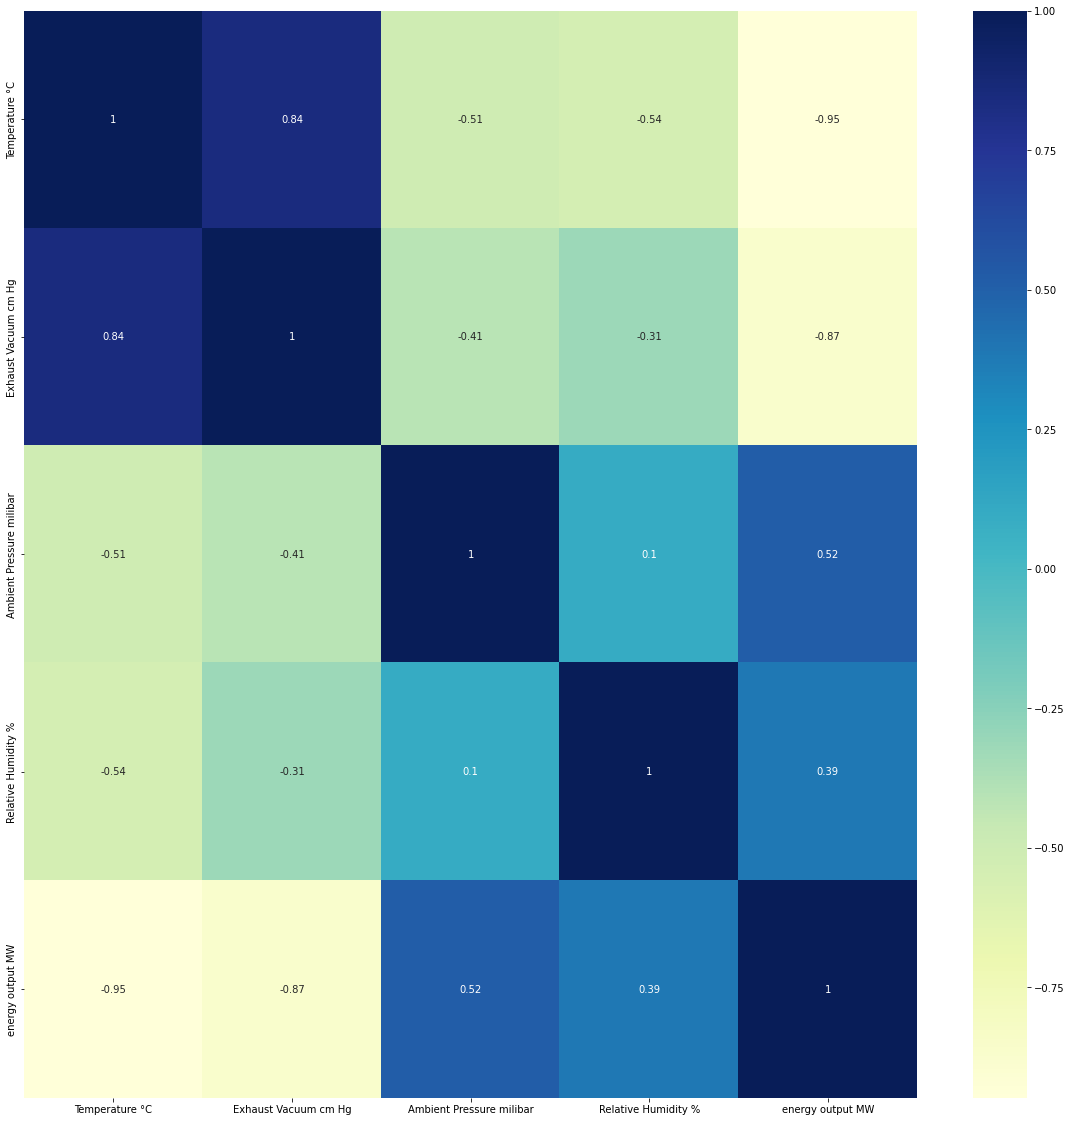

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [37]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
print(X.shape)
print(y.shape)

(9568, 4)
(9568,)


In [39]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state=0)

In [40]:
def lieReg():
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('===================Linear Regression===================')
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE Value for Linear regression is\n',rmse)
    R2 = metrics.r2_score(y_test,y_pred)
    print('R2 Score for Linear regression is\n',R2)

In [41]:
def navyBais():
    nb = GaussianNB().fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    print('===================Navie Bayes===================')
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE Value for Navie Bayes is\n',rmse)
    R2 = metrics.r2_score(y_test,y_pred)
    print('R2 Score for Navie Bayes is\n',R2)

In [42]:
def knn():
    #knn = knr(n_neighbors=2,metric = 'euclidean')
    knn = knr(n_neighbors=4,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('===================KNN===================')
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE Value for KNN is\n',rmse)
    R2 = metrics.r2_score(y_test,y_pred)
    print('R2 Score for KNN is\n',R2)

In [43]:
def svm():
    model = SVR(C=22)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('===================Support Vector===================')
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE Value for Support Vector is\n',rmse)
    R2 = metrics.r2_score(y_test,y_pred)
    print('R2 Score for Support Vector is\n',R2)

In [44]:
def dtree():
    dtree = dtr(max_depth = 6)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    print('===================Decision Tree===================')
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('RMSE Value for Decision Tree is\n',rmse)
    R2 = metrics.r2_score(y_test,y_pred)
    print('R2 Score for Decision Tree is\n',R2)

In [45]:
def main():
  lieReg()
  #navyBais()
  knn()
  svm()
  dtree()

main()

===================Linear Regression===================
RMSE Value for Linear regression is
 4.44226285844249
R2 Score for Linear regression is
 0.9325315554761303
===================KNN===================
RMSE Value for KNN is
 3.6585812248056677
R2 Score for KNN is
 0.9542366725935425
===================Support Vector===================
RMSE Value for Support Vector is
 5.596796422907774
R2 Score for Support Vector is
 0.8929045026926578
===================Decision Tree===================
RMSE Value for Decision Tree is
 4.07990323901447
R2 Score for Decision Tree is
 0.9430895633278857


In [46]:
for i in range(1,10):
    #knn = knr(n_neighbors=2,metric = 'euclidean')
    knn = knr(n_neighbors=i,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    R2 = metrics.r2_score(y_test,y_pred)*100
    print('R2 Score for ',i,' is',R2)

R2 Score for  1  is 92.8501416837377
R2 Score for  2  is 94.70145664392439
R2 Score for  3  is 95.19395104466678
R2 Score for  4  is 95.42366725935425
R2 Score for  5  is 95.35195609838095
R2 Score for  6  is 95.31769277864679
R2 Score for  7  is 95.28883165688472
R2 Score for  8  is 95.21197604148449
R2 Score for  9  is 95.20334070218895


In [47]:
for i in range(1,10):
    model = SVR(C=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    R2 = metrics.r2_score(y_test,y_pred)*100
    print('R2 Score for ',i,' is',R2)

R2 Score for  1  is 38.18211045129358
R2 Score for  2  is 61.07403313956134
R2 Score for  3  is 71.27354179123459
R2 Score for  4  is 76.68350354397799
R2 Score for  5  is 79.9110353649933


KeyboardInterrupt: 

In [ ]:
for i in range(1,10):
    dtree = dtr(max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    R2 = metrics.r2_score(y_test,y_pred)*100
    print('R2 Score for ',i,' is',R2)

R2 Score for  1  is 72.80420219675298
R2 Score for  2  is 86.3453038172977
R2 Score for  3  is 91.5014675880858
R2 Score for  4  is 93.01678084328728
R2 Score for  5  is 93.79341641783874
R2 Score for  6  is 94.3089563327886
R2 Score for  7  is 93.92643359049924
R2 Score for  8  is 93.96062396017973
R2 Score for  9  is 93.9020174039016


In [25]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.61700172 0.33005477 0.0309075  0.02203601]


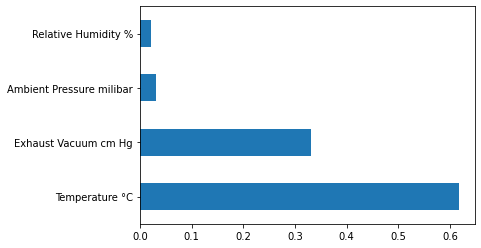

In [27]:
fi = pd.Series(model.feature_importances_, index=X.columns)
fi.plot(kind='barh')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [49]:
#Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [52]:
rf = RandomForestRegressor()

In [53]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  17.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [56]:
rf_random.best_score_

-11.185736748133465

In [57]:
predictions=rf_random.predict(X_test)

/home/munnazeera/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


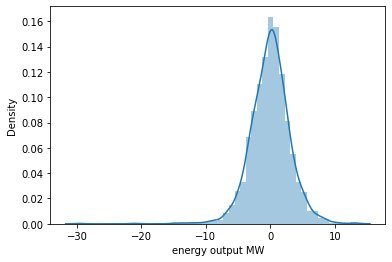

In [58]:
sns.distplot(y_test-predictions)

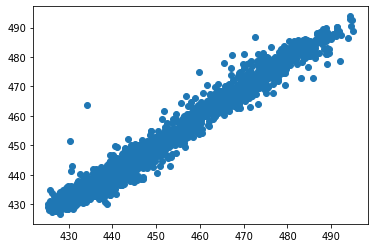

In [59]:
plt.scatter(y_test,predictions)

In [60]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.2653631581617253
MSE: 9.54776724485798
RMSE: 3.0899461556567585


In [62]:
import joblib
joblib.dump(rf_random,'model')

['model']

In [63]:
m = [[20,50,1008,38]]

In [64]:
solve = joblib.load('model')
print(solve.predict(m))

[453.88006]
